In [0]:
import tensorflow as tf

**MNIST Using NeuralNetwork**

In [0]:
def train_mnist():
    class myCallback1(tf.keras.callbacks.Callback):
            def on_epoch_end(self, epoch, logs={}):
                if(logs.get('accuracy')>0.99):
                    print("\nReached 99% accuracy so cancelling training!")
                    self.model.stop_training = True
    callbacks=myCallback1()

    mnist = tf.keras.datasets.mnist

    (x_train, y_train),(x_test, y_test) = mnist.load_data()
    #Normalizing Dataset
    x_train  = x_train / 255.0
    x_test = x_test / 255.0
    model = tf.keras.models.Sequential(
                                    [tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)]
    )

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # model fitting
    history = model.fit(
         x_train,y_train,epochs=10,callbacks=[callbacks]
    )
    # model fitting
    return history.epoch, history.history['accuracy'][-1]

In [0]:
train_mnist()

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1857 - accuracy: 0.9444
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0740 - accuracy: 0.9772
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0487 - accuracy: 0.9845
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0331 - accuracy: 0.9896
Epoch 5/10
1859/1875 [============================>.] - ETA: 0s - loss: 0.0261 - accuracy: 0.9913
Reached 99% accuracy so cancelling training!
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0261 - accuracy: 0.9913


([0, 1, 2, 3, 4], 0.991266667842865)

**FashionMNIST USING CNN**

In [0]:
class myCallback2(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epochs,logs={}):
    if(logs.get('accuracy')>0.998):
                print("\nReached 99% accuracy so cancelling training!")
                self.model.stop_training = True


In [0]:
callbacks=myCallback2()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=20,callbacks=[callbacks])
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 128)       147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               819456    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [0]:
#saving model
model.save('fashionkerascnn.h5')

In [0]:
0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

SyntaxError: ignored

5 1 3


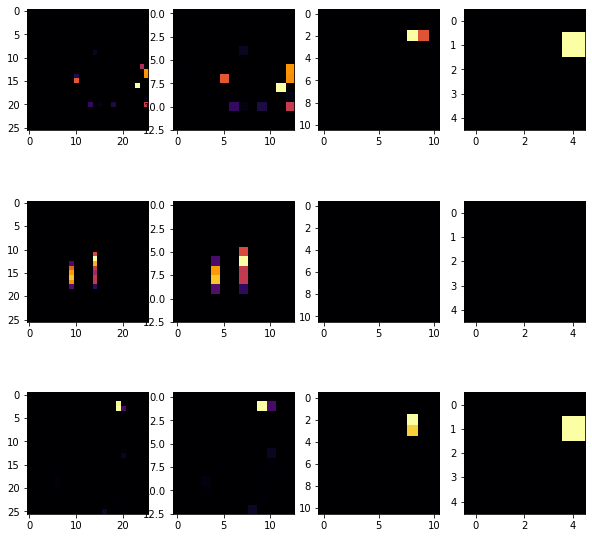

In [0]:
#Visualizing outputs of different layers in CNN
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4,figsize=(10,10))
FIRST_IMAGE=11
SECOND_IMAGE=15
THIRD_IMAGE=100
CONVOLUTION_NUMBER = 1
print(test_labels[FIRST_IMAGE],test_labels[SECOND_IMAGE],test_labels[THIRD_IMAGE])
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

In [0]:
del model

**MNIST Using CNN**

In [0]:
def train_mnist_conv():

    mnist = tf.keras.datasets.mnist
    (training_images, training_labels), (test_images, test_labels) = mnist.load_data()
    callbacks=myCallback2()
    training_images=training_images.reshape(60000, 28, 28, 1)
    training_images=training_images / 255.0
    test_images = test_images.reshape(10000, 28, 28, 1)
    test_images=test_images/255.0

    model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    history = model.fit(
        test_images,test_labels,epochs=20,callbacks=[callbacks]
    )
    return history.epoch, history.history['accuracy'][-1],model,test_images,test_labels



In [0]:
_,_,model,test_images,test_labels=train_mnist_conv()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 128)       147584    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               819456    
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

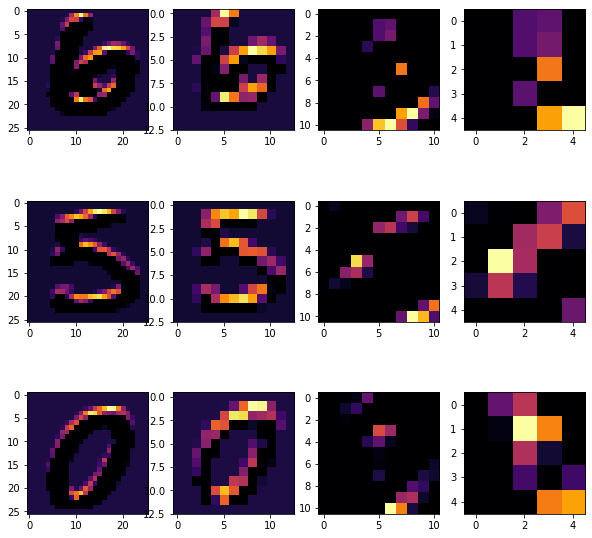

In [0]:
#Visualizing Output of different CNN layers
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4,figsize=(10,10))
FIRST_IMAGE=11
SECOND_IMAGE=15
THIRD_IMAGE=545
CONVOLUTION_NUMBER = 1
#print(test_labels[FIRST_IMAGE],test_labels[SECOND_IMAGE],test_labels[THIRD_IMAGE])
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

In [0]:
model.save("mnistcnn.h5")